# Training strategies

In [1]:
import copy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split

data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
original_data = copy.deepcopy(data)
target = 'IS_TOXIC'
positive = 'positive'
negative = 'negative'
print(data['IS_TOXIC'].value_counts())
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}
y: np.ndarray = data.pop('IS_TOXIC').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

negative    8251
positive     741
Name: IS_TOXIC, dtype: int64


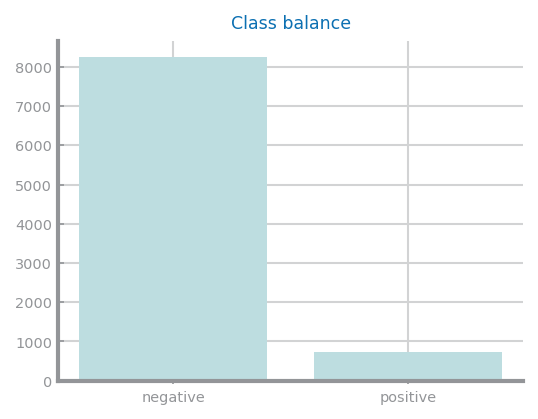

IS_TOXIC = Positive Minority class: 741
IS_TOXIC = Negative Majority class: 8251
Proportion: 0.09 : 1


In [2]:
target_count = original_data['IS_TOXIC'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('IS_TOXIC = Positive Minority class:', target_count[ind_min_class])
print('IS_TOXIC = Negative Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

Given the prior proportion, we consider that a Data Balancing Technique is needed.

# Unbalanced Naive Bayes with 1024 Features

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import *
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
y: np.ndarray = data.pop('IS_TOXIC').values
X: np.ndarray = data.values
labels = pd.unique(y)

In [4]:
import random
def split_balanced(X,y,train_size):
    X = X.tolist()
    y = y.tolist()
    random.seed()
    trn_size = len(X)*train_size
    tstX = []
    tstY = []
    trnX = []
    trnY = []
    while len(trnX)<trn_size:
        rand_num = random.randint(0,len(X)-1)
        trnX.append(X.pop(rand_num))
        trnY.append(y.pop(rand_num))
   
    y_01 = [[],[]]
    for ix in range(len(y)):
        if y[ix] == 'negative':
            y_01[0].append(X[ix])
        elif y[ix] == 'positive':
            y_01[1].append(X[ix])
    
    while len(y_01[0]) != 0 and len(y_01[1]) != 0:
        rand_num_0 = random.randint(0,len(y_01[0])-1)
        rand_num_1 = random.randint(0,len(y_01[1])-1)
        tstX.append(y_01[0].pop(rand_num_0))
        tstY.append('negative')
        tstX.append(y_01[1].pop(rand_num_1))
        tstY.append('positive')
        
    for ix in range(len(y_01[0])):
        trnX.append(y_01[0][ix])
        trnY.append('negative')
        
    for ix in range(len(y_01[1])):
        trnX.append(y_01[1][ix])
        trnY.append('positive')
        
    return trnX, tstX, trnY, tstY

## Multinomial

Confusion Matrix Test
TruePositives:  19779
FalsePositives:  8935
TrueNegatives:  13389
FalseNegatives:  2545


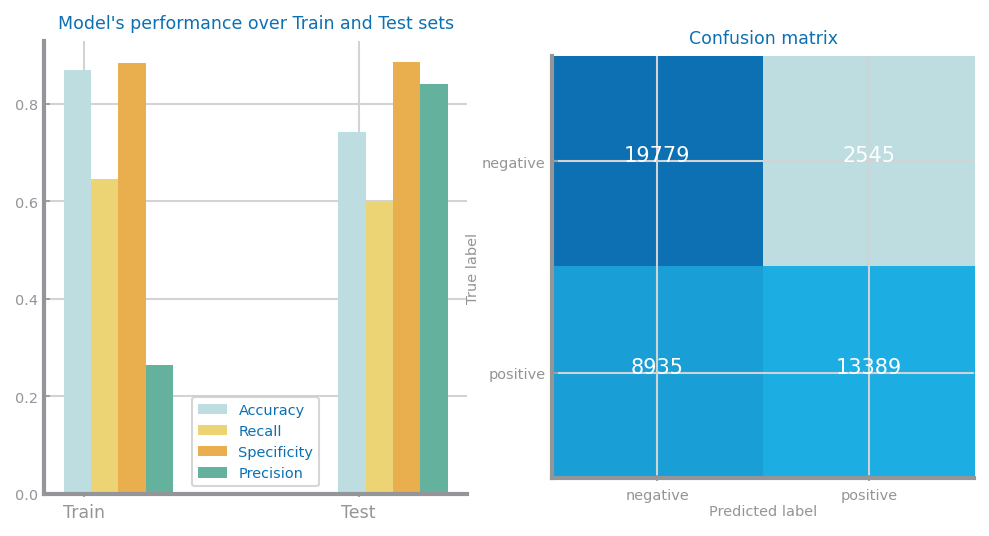

In [10]:
clf = MultinomialNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Gaussian

Confusion Matrix Test
TruePositives:  16747
FalsePositives:  6638
TrueNegatives:  15361
FalseNegatives:  5252


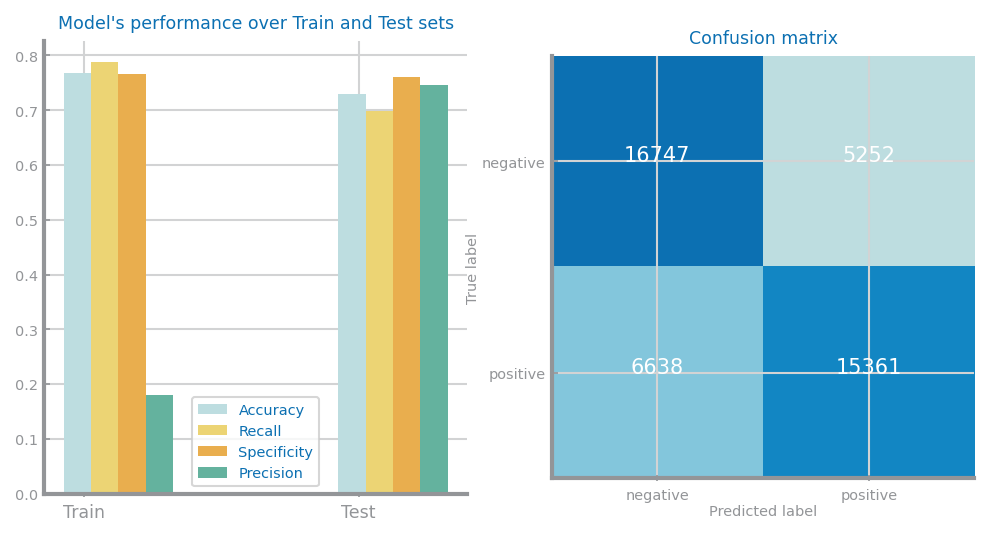

In [11]:
clf = GaussianNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Bernoulli

Confusion Matrix Test
TruePositives:  17952
FalsePositives:  7671
TrueNegatives:  14525
FalseNegatives:  4244


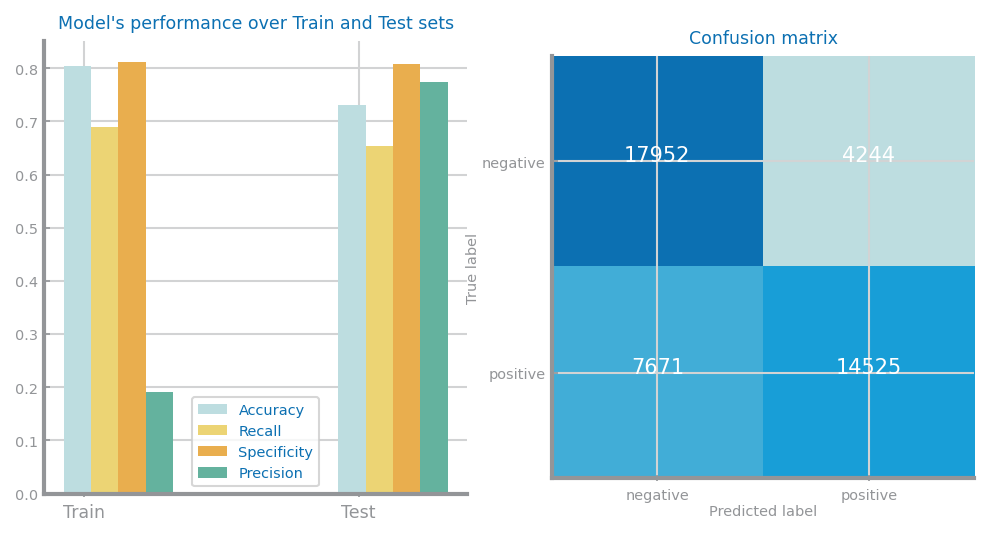

In [12]:
clf = BernoulliNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

Results:
    -  Multinomial Naive Bayes
        -  Accuracy: 74% | Recall: 60% | Specificity: 89% | Precision: 84% (F1-Score: 70%)
    -  Gaussian Naive Bayes
        -  Accuracy: 73% | Recall: 70% | Specificity: 76% | Precision: 75% (F1-Score: 72%)
    -  Bernoulli Naive Bayes
        -  Accuracy: 73% | Recall: 65% | Specificity: 81% | Precision: 77% (F1-Score: 70%)
**All 3 versions of NB were almost as good as each other differing at max on 1%-2% of accuracy/F1-Score**

# Unbalanced Naive Bayes with 446 Features (95% variance)

In [36]:
def variance(X):
    variance = [0 for ix in range(X.shape[1])]
    for row in range(len(X[0])):
        variance[row] = (sum(X[:,row])/len(X[:,row]))*(1-(sum(X[:,row])/len(X[:,row])))
    return variance

In [80]:
var = variance(X)
threshold = 0.95
columns = []
for ix in range(len(var)):
    if var[ix] > threshold*(1-threshold):
        columns.append(ix)

columnsAt = (columns,threshold)
print(len(columns),columnsAt[1])

446 0.95


In [81]:
X_th = copy.deepcopy(X)
for ix in range(X.shape[1]-1,-1,-1):  
    if ix not in columnsAt[0]:
        X_th = np.delete(X_th,ix,1)
X_th.shape

(8992, 446)

Confusion Matrix Test
TruePositives:  19412
FalsePositives:  9771
TrueNegatives:  12624
FalseNegatives:  2983


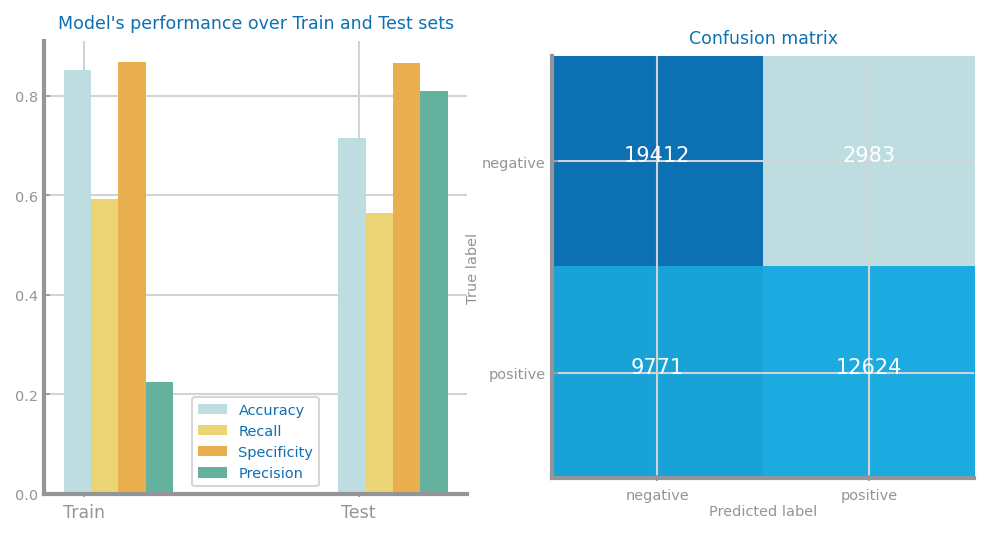

In [82]:
clf = MultinomialNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X_th, y, 0.7)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

Confusion Matrix Test
TruePositives:  15190
FalsePositives:  6244
TrueNegatives:  15942
FalseNegatives:  6996


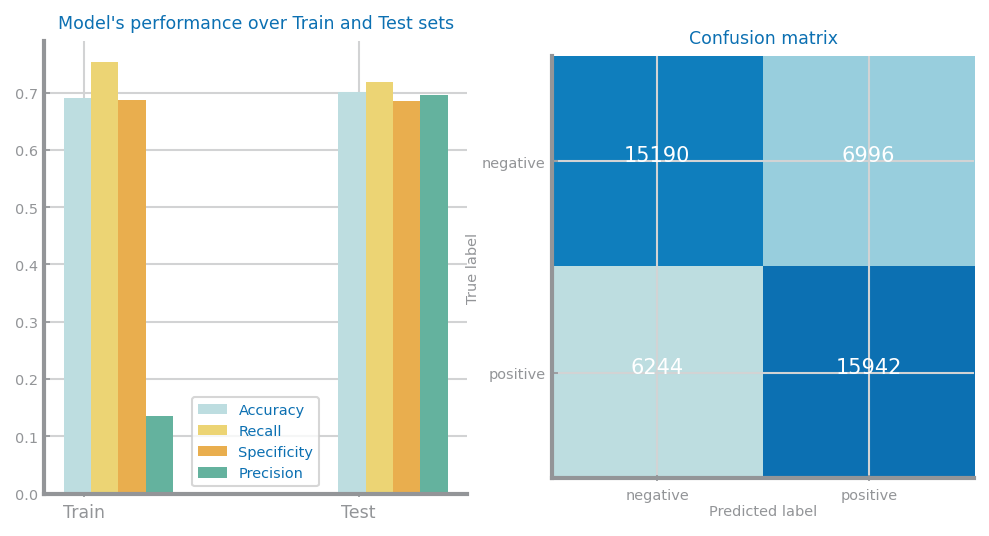

In [83]:
clf = GaussianNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X_th, y, 0.7)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

Confusion Matrix Test
TruePositives:  16503
FalsePositives:  7507
TrueNegatives:  14866
FalseNegatives:  5870


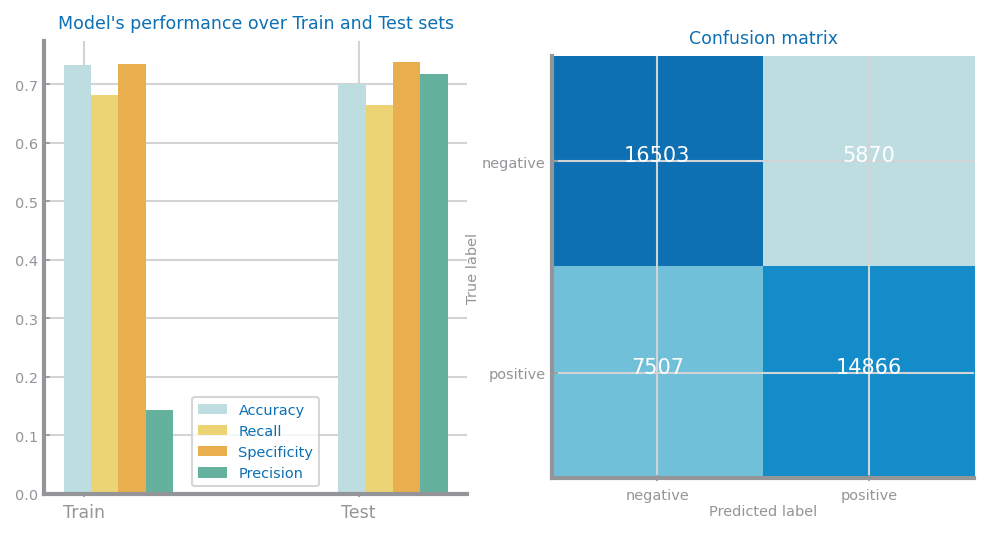

In [84]:
clf = BernoulliNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X_th, y, 0.7)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

Results:
    -  Multinomial Naive Bayes
        -  Accuracy: 72%[-1%] | Recall: 56% | Specificity: 91% | Precision: 81% (F1-Score: 66% [-4%])
    -  Gaussian Naive Bayes
        -  Accuracy: 70%[-3%] | Recall: 72% | Specificity: 68% | Precision: 70% (F1-Score: 71% [-1%])
    -  Bernoulli Naive Bayes
        -  Accuracy: 70%[-3%] | Recall: 66% | Specificity: 74% | Precision: 72% (F1-Score: 69% [-1%])
By reducing the feature to more than half there was a loss of less than 5% in both accuracy and F1-Score.

# Preparing data for balancing

In [85]:
data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
y: np.ndarray = data.pop('IS_TOXIC').values
X: np.ndarray = data.values
labels = pd.unique(y)

In [86]:
import random
def balancing(trnX, trnY, undersample, oversample):
    #undersample, oversample = 1,0 => undersample
    #undersample, oversample = 0,1 => oversample
    unique, counts = np.unique(trnY, return_counts=True)
    
    min_positive_counts = min(counts)
    min_negative_counts = max(counts)+(min(counts)-max(counts))*undersample
    newtrnY: np.ndarray = []
    newtrnX: np.ndarray = []
    for idx in range(len(trnY)):
        if min_positive_counts > 0 and trnY[idx] == 'positive':
            newtrnY.append(trnY[idx])
            newtrnX.append(trnX[idx])
            min_positive_counts -= 1
        elif min_negative_counts > 0 and trnY[idx] == 'negative':
            newtrnY.append(trnY[idx])
            newtrnX.append(trnX[idx])
            min_negative_counts -= 1
            
    unique1, counts1 = np.unique(newtrnY, return_counts=True)
    
    max_positive_counts = min(counts1)+(max(counts1)-min(counts1))*oversample
    max_negative_counts = max(counts1)
    finaltrnY: np.ndarray = []
    finaltrnX: np.ndarray = []
    negX: np.ndarray = []
    posX: np.ndarray = []
    negY: np.ndarray = []
    posY: np.ndarray = []
        
    for idx in range(len(newtrnY)):
        if newtrnY[idx] == 'negative':
            finaltrnY.append(newtrnY[idx])
            negY.append(newtrnY[idx])
            finaltrnX.append(newtrnX[idx])
            negX.append(newtrnX[idx])
            max_negative_counts -= 1
        elif newtrnY[idx] == 'positive':
            finaltrnY.append(newtrnY[idx])
            posY.append(newtrnY[idx])
            finaltrnX.append(newtrnX[idx])
            posX.append(newtrnX[idx])
            max_positive_counts -= 1

    random.seed()

    while max_negative_counts > 0:
        rand_num = random.randint(0,len(negX)-1)
        finaltrnX.append(negX[rand_num])
        finaltrnY.append(negY[rand_num])
        max_negative_counts -= 1

    while max_positive_counts > 0:
        rand_num = random.randint(0,len(posX)-1)
        finaltrnX.append(posX[rand_num])
        finaltrnY.append(posY[rand_num])
        max_positive_counts -= 1
    
    return finaltrnX, finaltrnY
    

# UnderSample Naive Bayes with 1024 features

## Multinomial

Confusion Matrix Test
TruePositives:  17339
FalsePositives:  6643
TrueNegatives:  15578
FalseNegatives:  4882


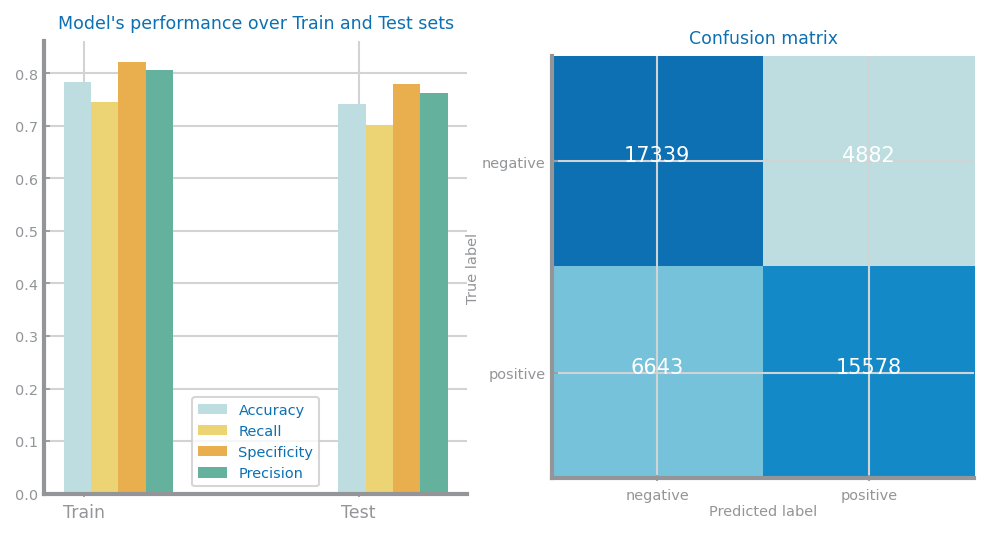

In [88]:
clf = MultinomialNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = balancing(trnX,trnY,1,0)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Gaussian

Confusion Matrix Test
TruePositives:  16267
FalsePositives:  6063
TrueNegatives:  16361
FalseNegatives:  6157


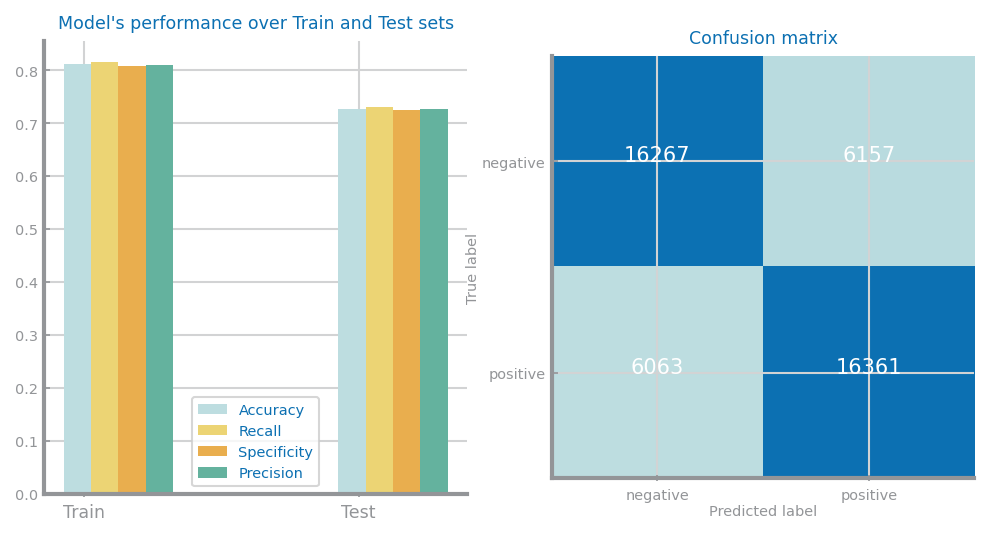

In [89]:
clf = GaussianNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = balancing(trnX,trnY,1,0)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Bernoulli

Confusion Matrix Test
TruePositives:  15598
FalsePositives:  6185
TrueNegatives:  15960
FalseNegatives:  6547


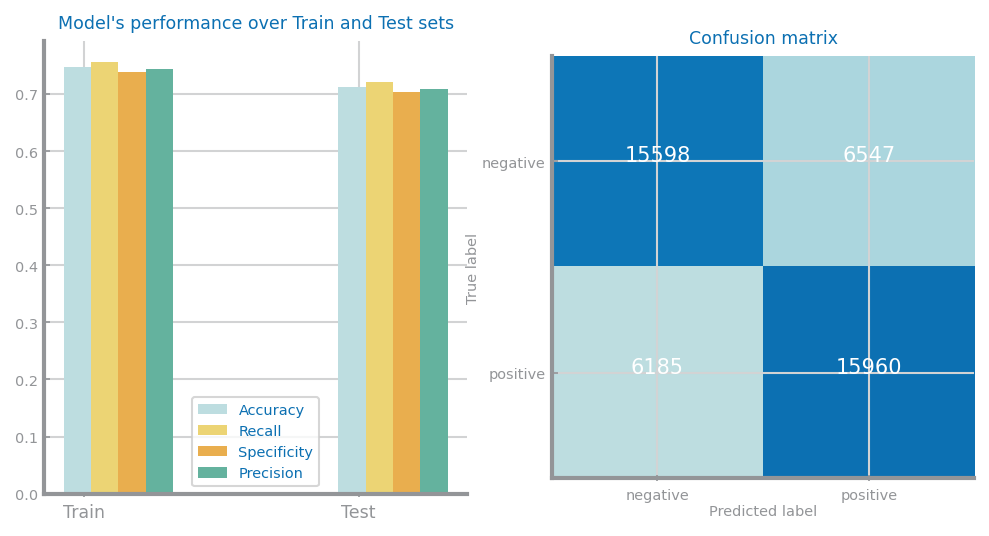

In [90]:
clf = BernoulliNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = balancing(trnX,trnY,1,0)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

Results:
    -  Multinomial Naive Bayes
        -  Accuracy: 74% | Recall: 70% | Specificity: 78% | Precision: 76%
Both Bernoulli and Gaussian Naive Bayes had slightly worse results than multinomial. Multinomial with Undersampling is until now the best approach to classification (with an F1-Score of: 73%).

# OverSample Naive Bayes

## Multinomial

Confusion Matrix Test
TruePositives:  17852
FalsePositives:  7098
TrueNegatives:  15229
FalseNegatives:  4475


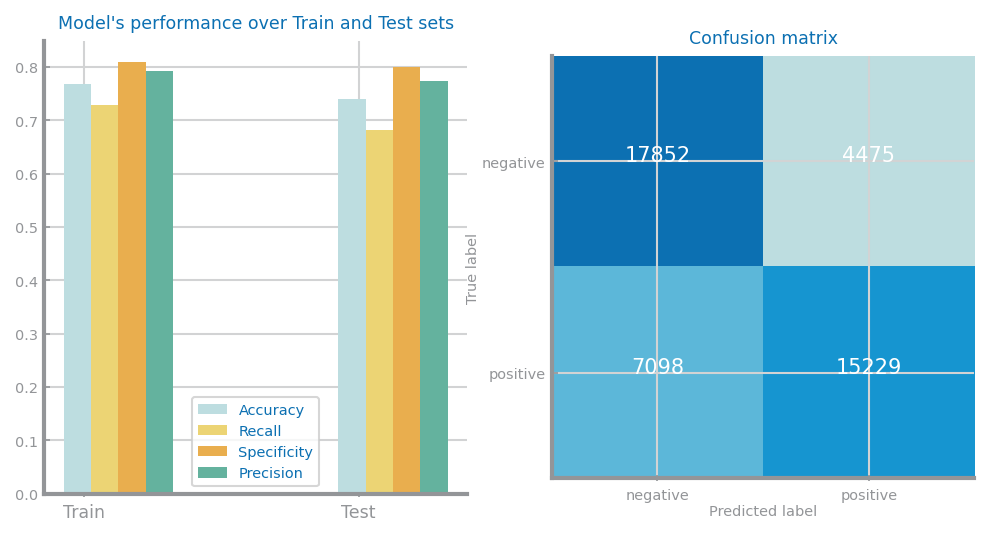

In [91]:
clf = MultinomialNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = balancing(trnX,trnY,0,1)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Gaussian

Confusion Matrix Test
TruePositives:  16634
FalsePositives:  6555
TrueNegatives:  15641
FalseNegatives:  5562


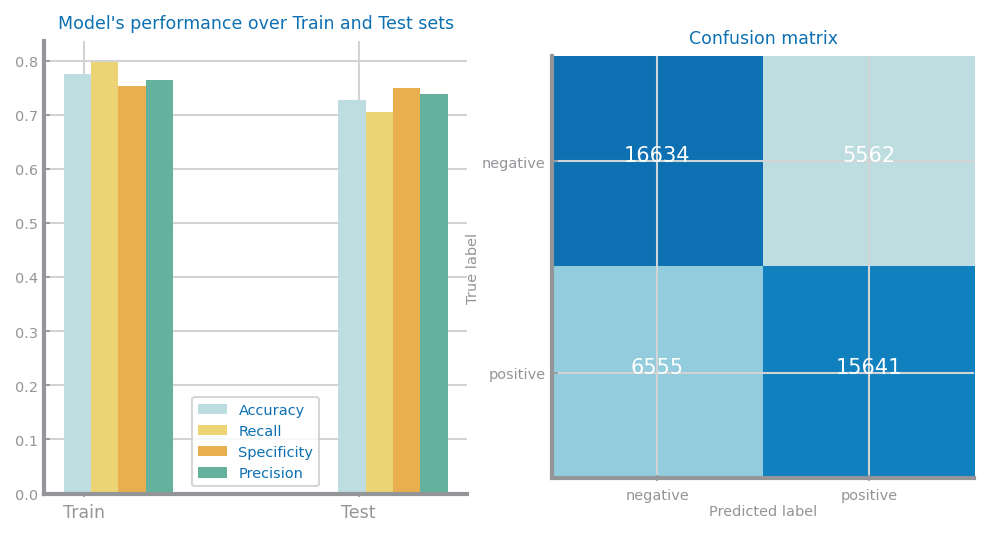

In [92]:
clf = GaussianNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = balancing(trnX,trnY,0,1)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Bernoulli

Confusion Matrix Test
TruePositives:  16051
FalsePositives:  6325
TrueNegatives:  15872
FalseNegatives:  6146


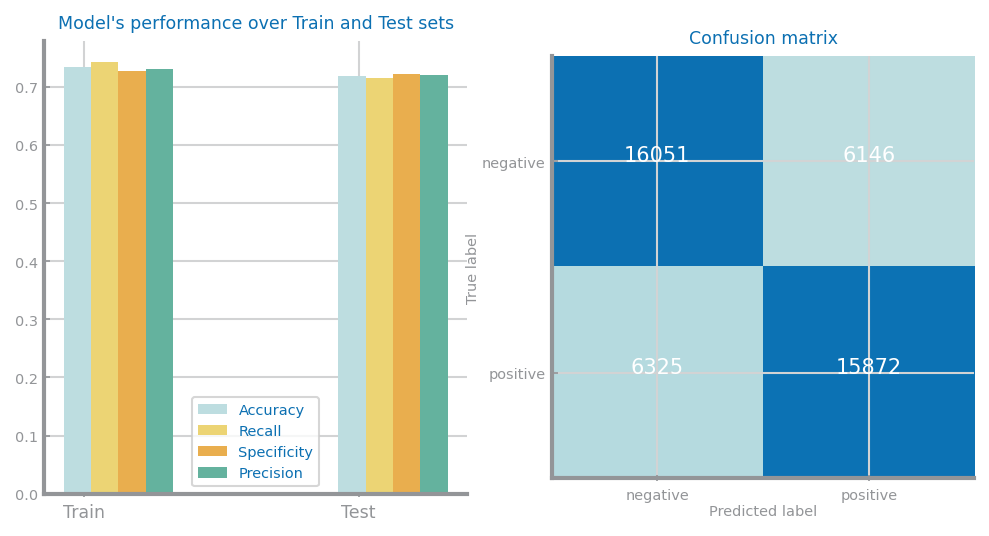

In [93]:
clf = BernoulliNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = balancing(trnX,trnY,0,1)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

Results:
    -  Multinomial Naive Bayes
        -  Accuracy: 74% | Recall: 68% | Specificity: 80% | Precision: 77% (F1-Score: 72%)
    -  Gaussian Naive Bayes
        -  Accuracy: 73% | Recall: 70% | Specificity: 75% | Precision: 74% (F1-Score: 72%)
Bernoulli results were slightier worse than Multinomial and Gaussian.

# SMOTE Naive Bayes

In [94]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

## Multinomial

Confusion Matrix Test
TruePositives:  19803
FalsePositives:  10148
TrueNegatives:  11971
FalseNegatives:  2316


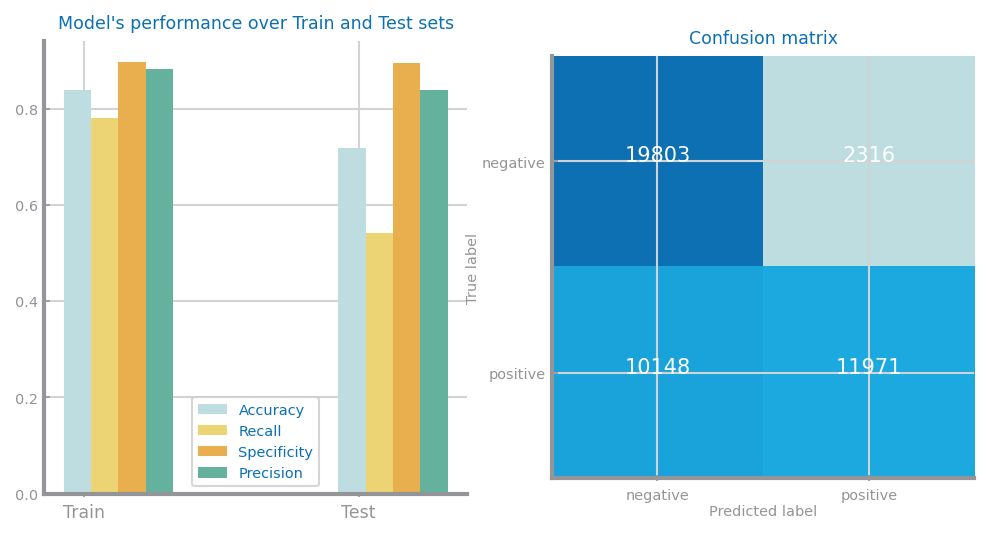

In [95]:
clf = MultinomialNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = smote.fit_sample(trnX,trnY)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Gaussian

Confusion Matrix Test
TruePositives:  19165
FalsePositives:  15077
TrueNegatives:  7163
FalseNegatives:  3075


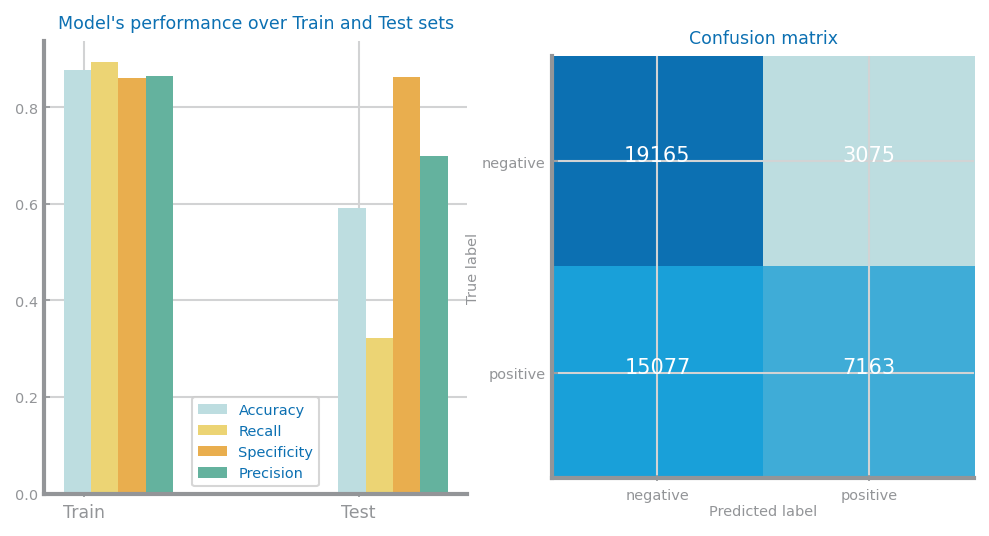

In [96]:
clf = GaussianNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = smote.fit_sample(trnX,trnY)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Bernoulli

Confusion Matrix Test
TruePositives:  16411
FalsePositives:  8999
TrueNegatives:  13196
FalseNegatives:  5784


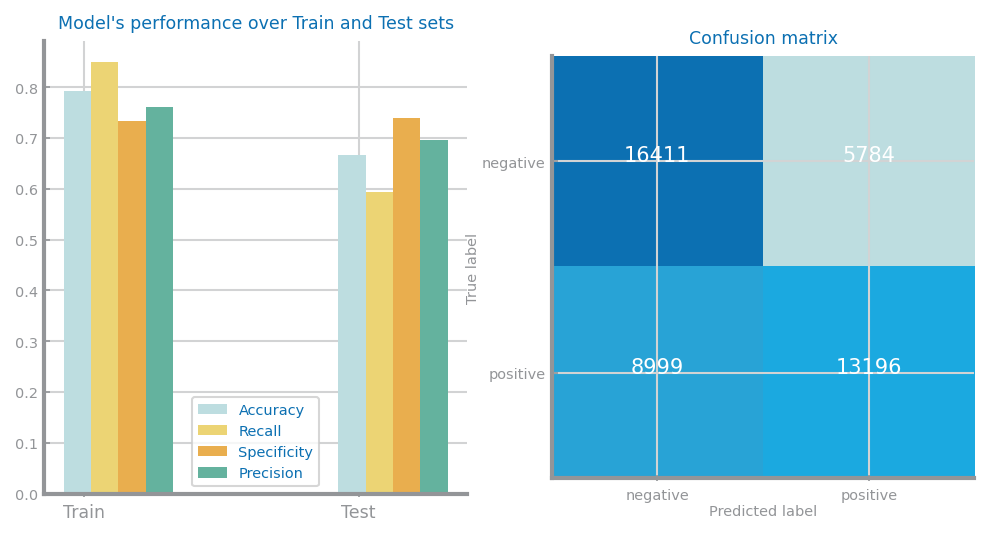

In [97]:
clf = BernoulliNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = smote.fit_sample(trnX,trnY)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

SMOTE balancing had worse recall than all the other approaches as one can distinguish on the Confusion Matrix.

# Combining OverSample and UnderSample for features with 95% variance

## Multinomial

Confusion Matrix Test
TruePositives:  17617
FalsePositives:  7704
TrueNegatives:  14462
FalseNegatives:  4549
Confusion Matrix Test
TruePositives:  16833
FalsePositives:  6954
TrueNegatives:  15181
FalseNegatives:  5302
Confusion Matrix Test
TruePositives:  17229
FalsePositives:  7563
TrueNegatives:  14496
FalseNegatives:  4830
Confusion Matrix Test
TruePositives:  16828
FalsePositives:  6962
TrueNegatives:  15324
FalseNegatives:  5458


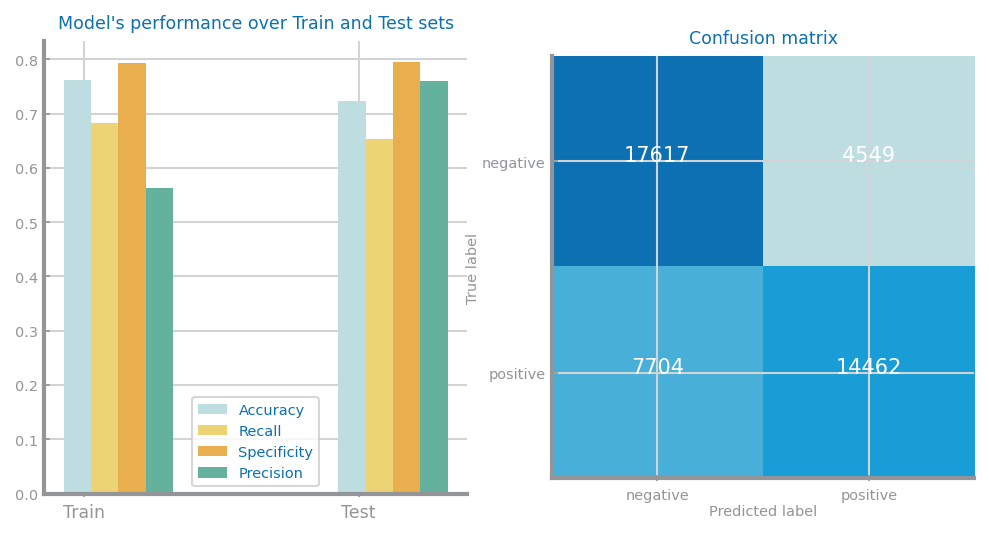

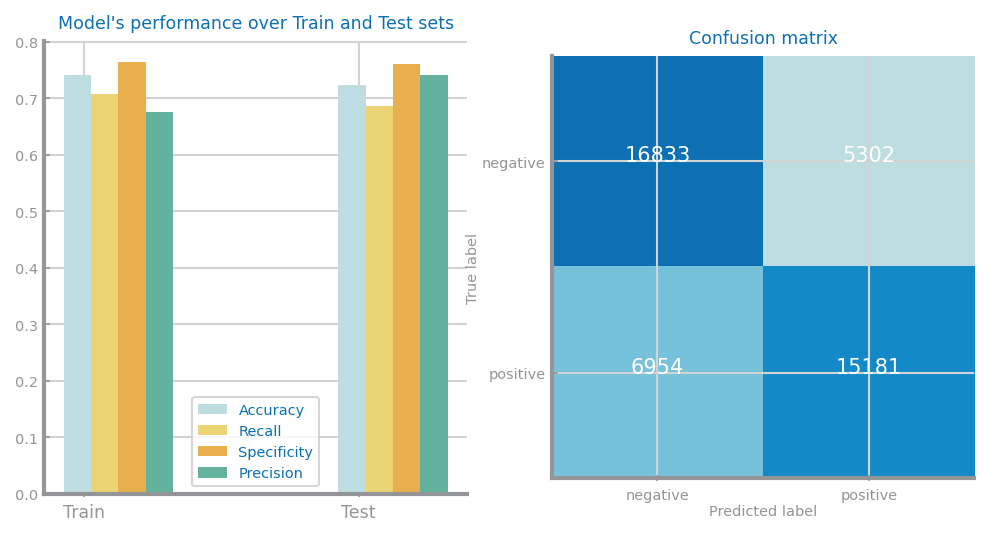

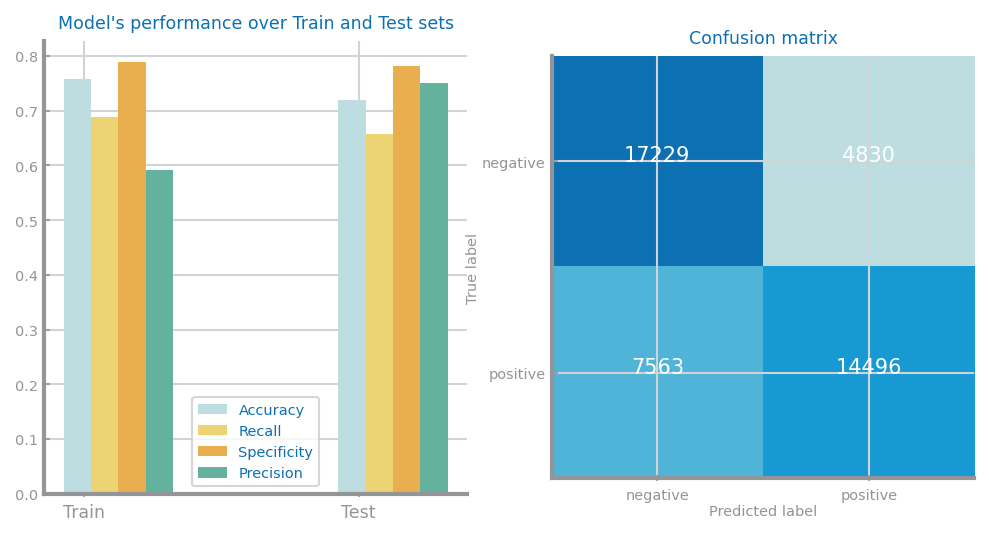

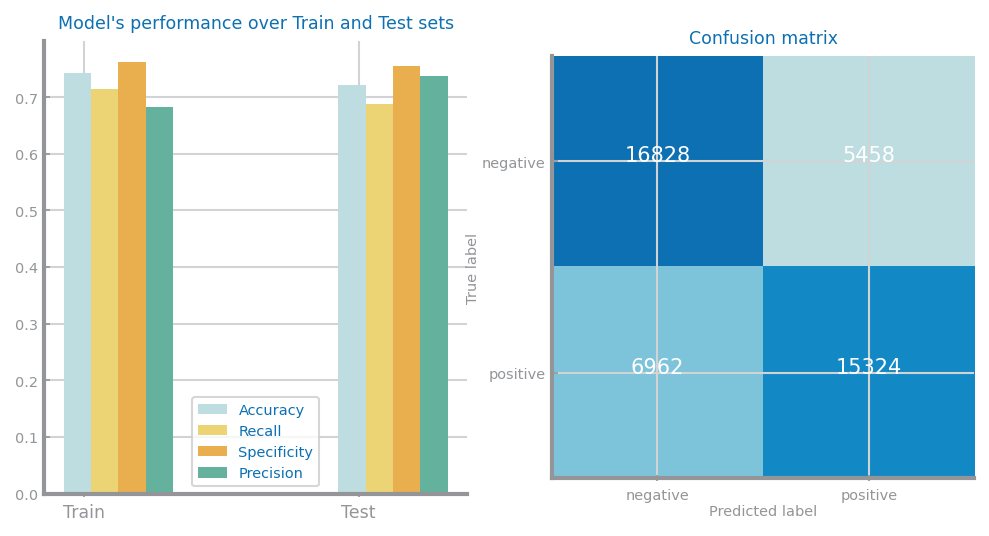

In [98]:
undersample_range = [x*0.33 for x in range(1,3)]
oversample_range = [x*0.33 for x in range(1,3)]
clf = MultinomialNB()
for undersample in undersample_range:
    for oversample in oversample_range:
        clf = MultinomialNB()
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(X_th, y, 0.7)
            trnX, trnY = balancing(trnX,trnY,undersample,oversample)
            for yi in trnY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(trnX, trnY)
            prd_trn = clf.predict(trnX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
        ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Gaussian

Confusion Matrix Test
TruePositives:  14915
FalsePositives:  6003
TrueNegatives:  16150
FalseNegatives:  7238
Confusion Matrix Test
TruePositives:  14802
FalsePositives:  5923
TrueNegatives:  16174
FalseNegatives:  7295
Confusion Matrix Test
TruePositives:  14851
FalsePositives:  5939
TrueNegatives:  16345
FalseNegatives:  7433
Confusion Matrix Test
TruePositives:  14794
FalsePositives:  5862
TrueNegatives:  16312
FalseNegatives:  7380


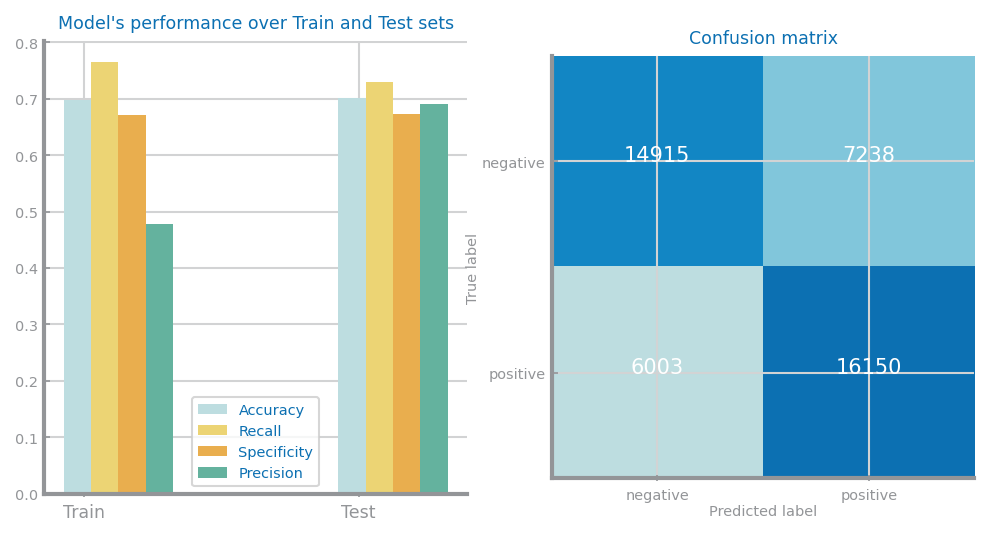

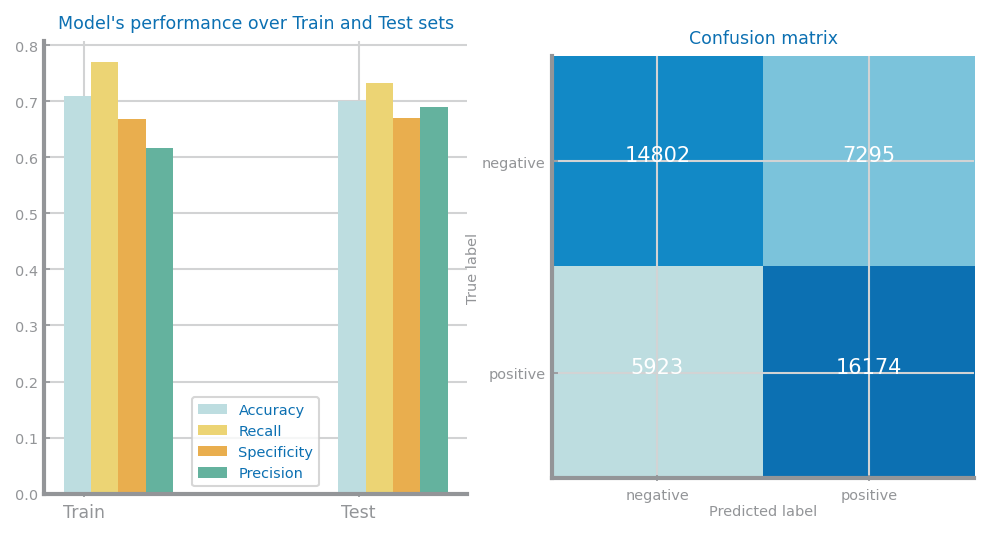

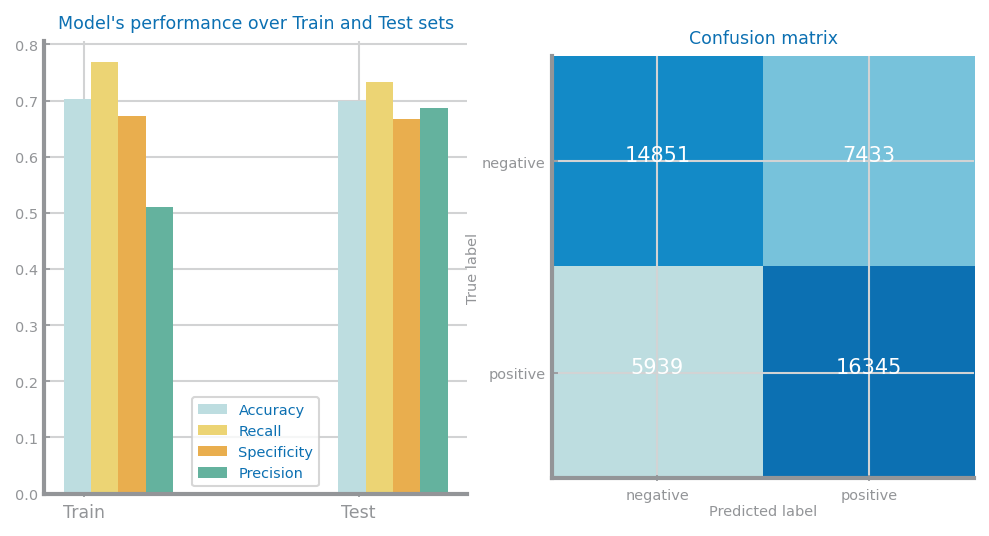

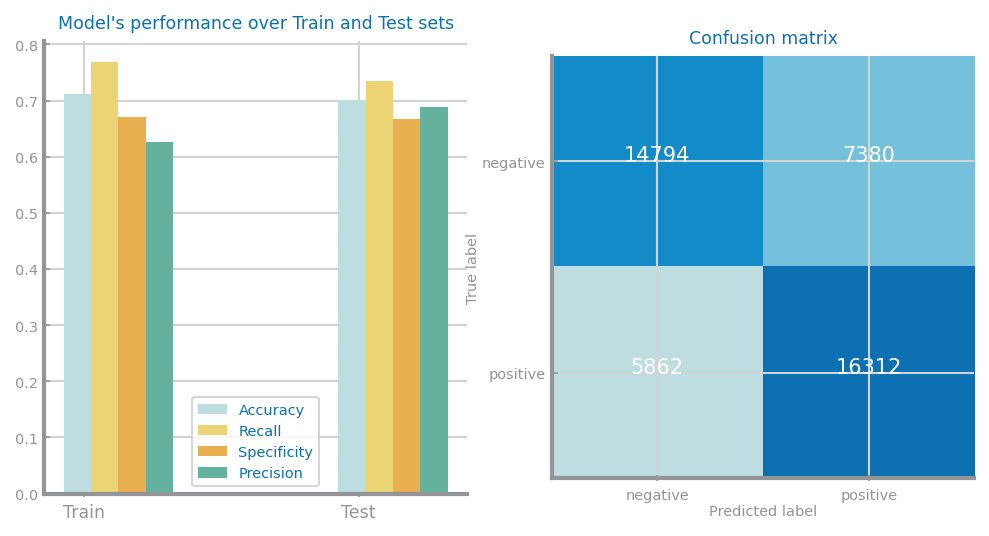

In [99]:
undersample_range = [x*0.33 for x in range(1,3)]
oversample_range = [x*0.33 for x in range(1,3)]
for undersample in undersample_range:
    for oversample in oversample_range:
        clf = GaussianNB()
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(X_th, y, 0.7)
            trnX, trnY = balancing(trnX,trnY,undersample,oversample)
            for yi in trnY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(trnX, trnY)
            prd_trn = clf.predict(trnX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
        ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Bernoulli

Confusion Matrix Test
TruePositives:  15137
FalsePositives:  6565
TrueNegatives:  15634
FalseNegatives:  7062
Confusion Matrix Test
TruePositives:  14640
FalsePositives:  6295
TrueNegatives:  15749
FalseNegatives:  7404
Confusion Matrix Test
TruePositives:  15154
FalsePositives:  6617
TrueNegatives:  15585
FalseNegatives:  7048
Confusion Matrix Test
TruePositives:  14786
FalsePositives:  6260
TrueNegatives:  16090
FalseNegatives:  7564


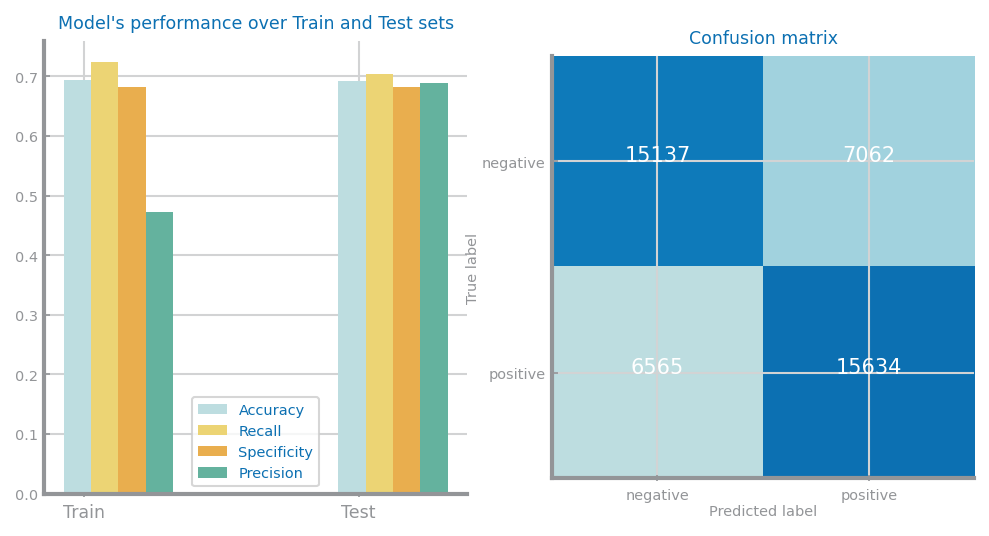

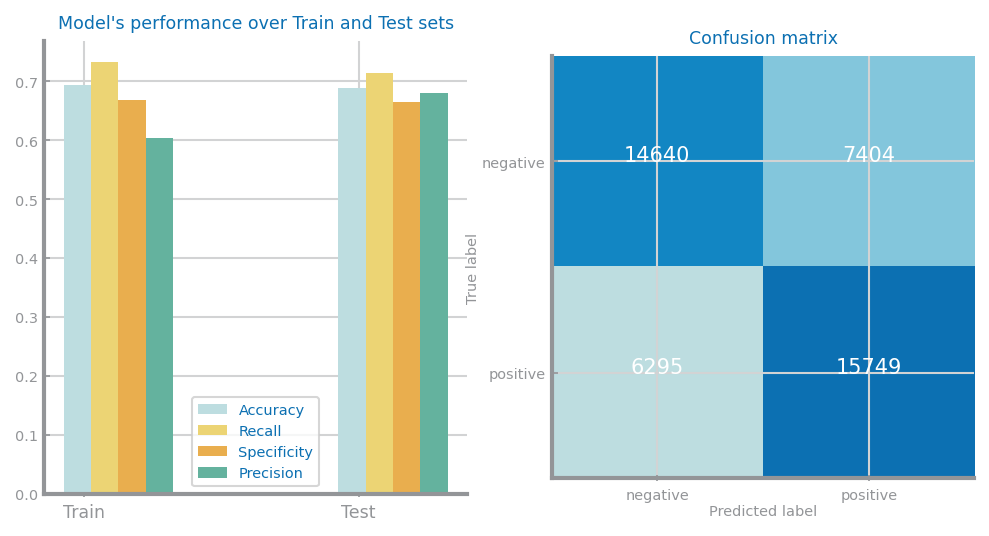

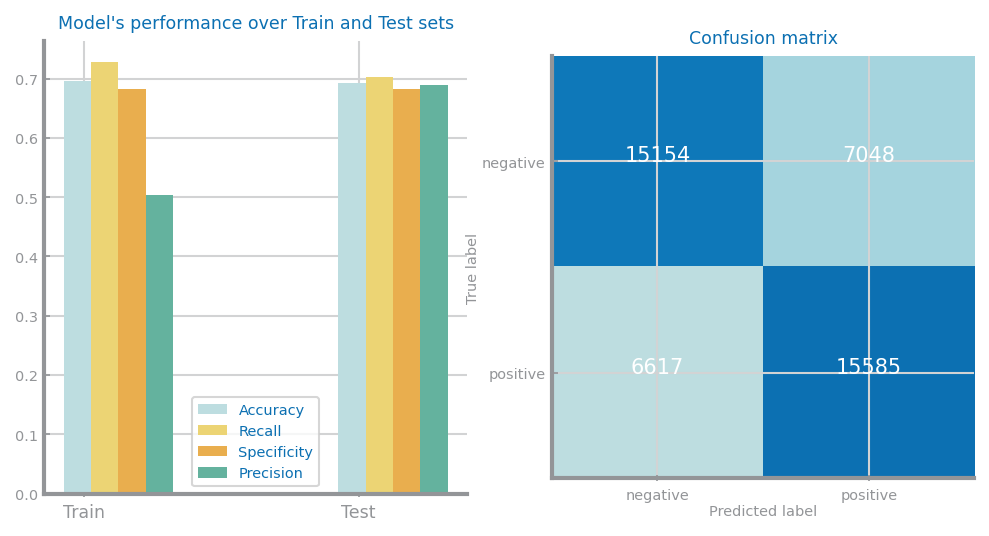

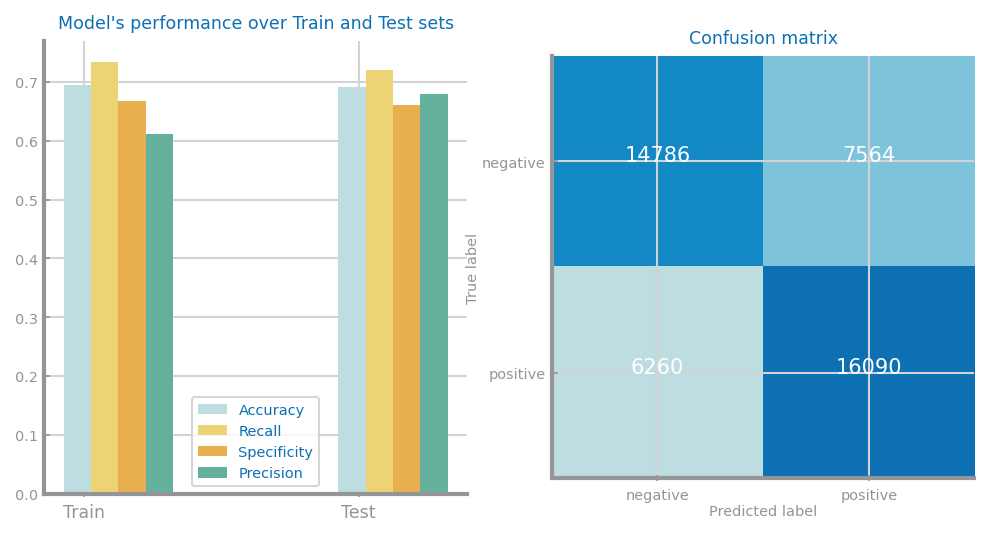

In [100]:
undersample_range = [x*0.33 for x in range(1,3)]
oversample_range = [x*0.33 for x in range(1,3)]
for undersample in undersample_range:
    for oversample in oversample_range:
        clf = BernoulliNB()
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(X_th, y, 0.7)
            trnX, trnY = balancing(trnX,trnY,undersample,oversample)
            for yi in trnY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(trnX, trnY)
            prd_trn = clf.predict(trnX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
        ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

# Final Thoughts

The best results were obtained running **Multinomial Naive Bayes** with Undersampling and will be replicated below:

Confusion Matrix Test
TruePositives:  17261
FalsePositives:  6708
TrueNegatives:  15486
FalseNegatives:  4933


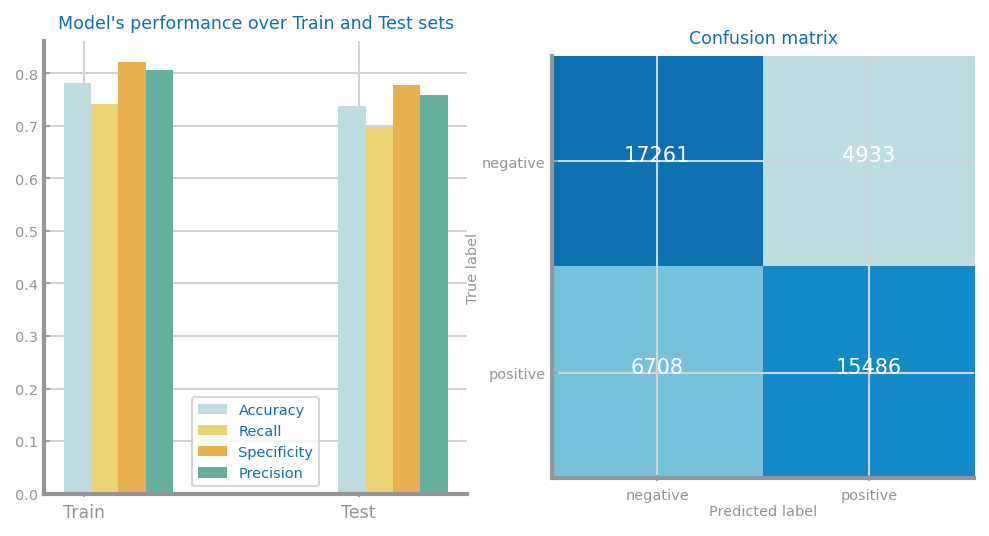

In [101]:
clf = MultinomialNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = balancing(trnX,trnY,1,0)
    for yi in trnY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)